In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In this notebook, We will try identify survival rate based on certain feature of titanic data set. Below are the some feature description.

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [2]:
#importing pandas,numpy,matplotlib etc

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importing data set
train_df = pd.read_csv(r"../input/titanic/train.csv")
test_df = pd.read_csv(r"../input/titanic/test.csv")

In [4]:
#shape of train data set
train_df.shape

(891, 12)

In [5]:
#shape of test data set
test_df.shape

(418, 11)

In [6]:
#we can see there some null values for Age,Cabin,Embarked in training data set
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#we can see there some null values for Age,Fare,Cabin in test data set
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#count of null values in train_df
pd.isnull(train_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#count of null values in train_df
pd.isnull(test_df).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#selecting rows which has any of the columns as null values from train data set
train_df[train_df.isnull().any(axis ="columns")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
#selecting sample 5 rows from train_df
train_df.sample(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
407,408,1,2,"Richards, Master. William Rowe",male,3.0,1,1,29106,18.7500,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,0,0,315093,8.6625,NaN,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S


Now lets see distribution of Survived/Not Survived from our trainging dataset.


In [12]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5c87132b90>,
 [Text(-0.39257493509945834, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Srvived')],
 [Text(-0.2141317827815227, 0.5604886971231505, '61.62%  (549)'),
  Text(0.21413183525826085, -0.5604886770746836, '38.38%  (342)')])

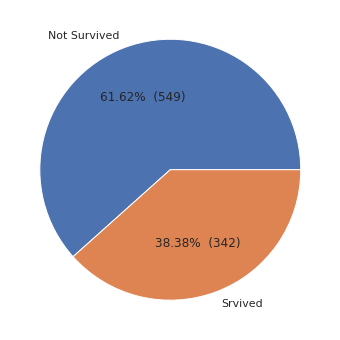

In [13]:
#Percentage & Values together of Survived/Not Survived based on train data frame using matplotlib using style as "ggplot"
survivalrates = train_df["Survived"].value_counts().tolist()
plt.figure(figsize=(6,6))
sns.set()
plt.pie(survivalrates,
        labels = ['Not Survived','Srvived'],
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(survivalrates)/100))

In [14]:
#Survival Distribution by Pclass using different ploting technique
train_df_grouped = train_df.groupby(by=["Pclass","Survived"])
train_df_grouped_by_size = train_df_grouped.size()
train_df_grouped_by_size

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

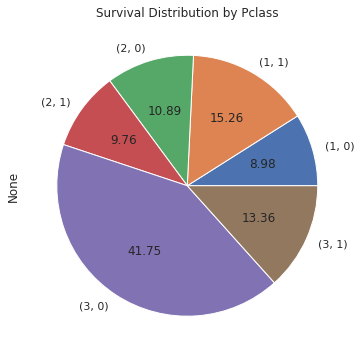

In [15]:
#Now lets visualize the above data set using matplotlib pie chart
sns.set()
train_df_grouped_by_size.plot(kind="pie",
                              autopct='%.2f',
                              figsize=(6,6),
                              title="Survival Distribution by Pclass")

In [16]:
#installing pandas bokeh. Its supported on python 3.5 and above
!pip install pandas-bokeh

In [17]:
#importing pandas bokeh
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [18]:
#Plotting the same data using plot_bokeh
train_df_grouped_by_size.plot_bokeh(kind="pie",
                                    title="Survival Distribution by Pclass")

Figure(id='1037', ...)

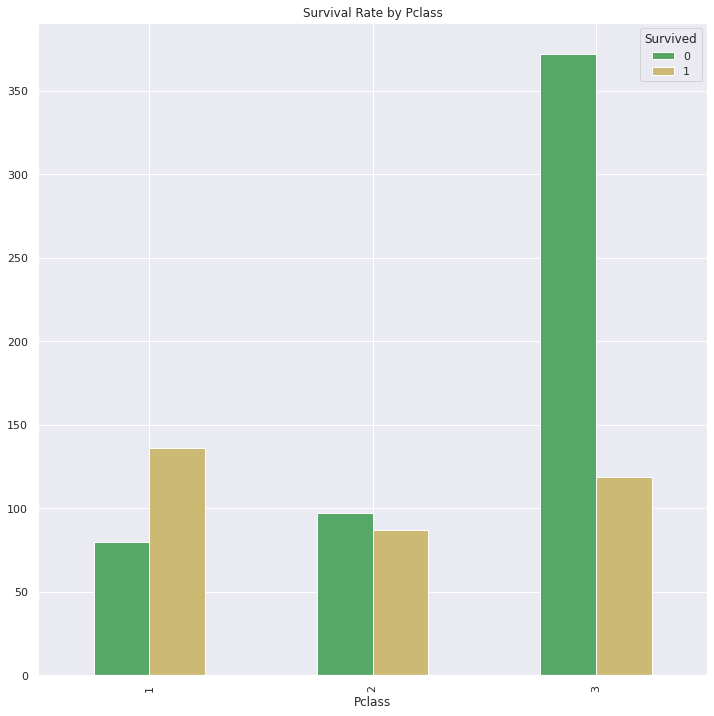

In [19]:
#You can see survival rate in "Pclass = 3" is very low, So "Pclass" is important feature to identify the survival rate
#Survival rate is highest in Pclass = 1 i.e Upper Class 
pd.crosstab(train_df["Pclass"],train_df["Survived"]).plot.bar(figsize=(12,12),
                                                              title="Survival Rate by Pclass",
                                                              color='gy')

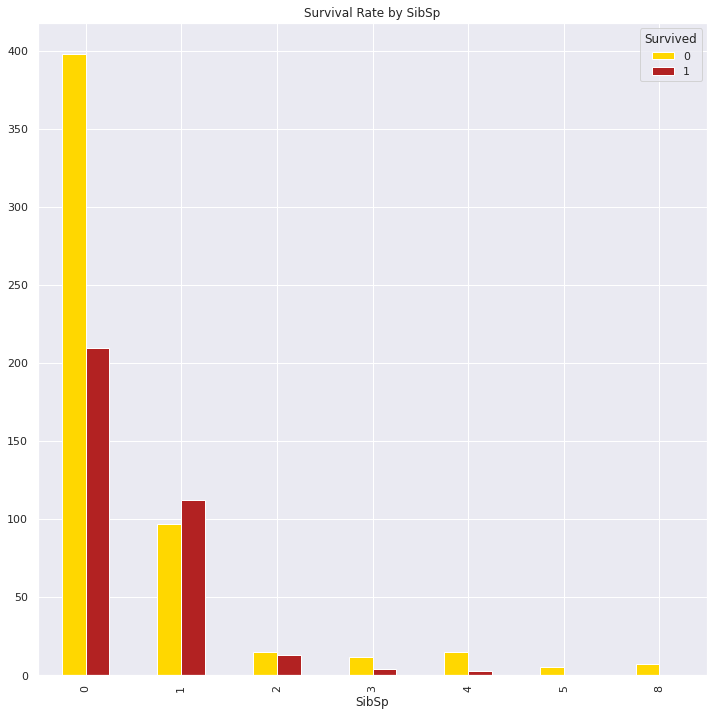

In [20]:
#Survival rate based on "SibSp".
pd.crosstab(train_df["SibSp"],train_df["Survived"]).plot.bar(figsize=(12,12),
                                                             title="Survival Rate by SibSp",
                                                             color = ["gold","firebrick"])

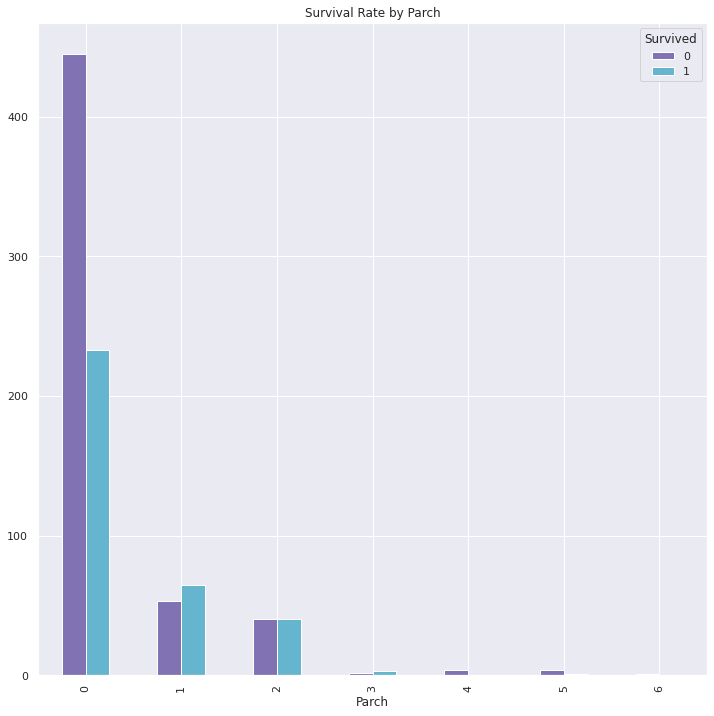

In [21]:
#Survival rate based on "Parch".We can see survival rate is lower in case of Parch = 0
pd.crosstab(train_df["Parch"],train_df["Survived"]).plot.bar(figsize=(12,12),
                                                             title="Survival Rate by Parch",
                                                             color='mc')

Now,lets create a new **title** column from **name** column for both train and test dataset 


In [22]:
train_df["Title"] = train_df["Name"].str.split(",").str.get(1).str.split(".").str.get(0).str.strip()
train_df["Title"] = train_df["Title"].replace(["Dr","Rev","Col","Mlle","Major","Ms","the Countess","Sir","Jonkheer","Capt","Lady","Mme","Don"],
                         "Other")
test_df["Title"] = test_df["Name"].str.split(",").str.get(1).str.split(".").str.get(0).str.strip()
test_df["Title"] = test_df["Title"].replace(["Dr","Rev","Col","Mlle","Major","Ms","the Countess","Sir","Jonkheer","Capt","Lady","Mme","Don","Dona"],
                         "Other")

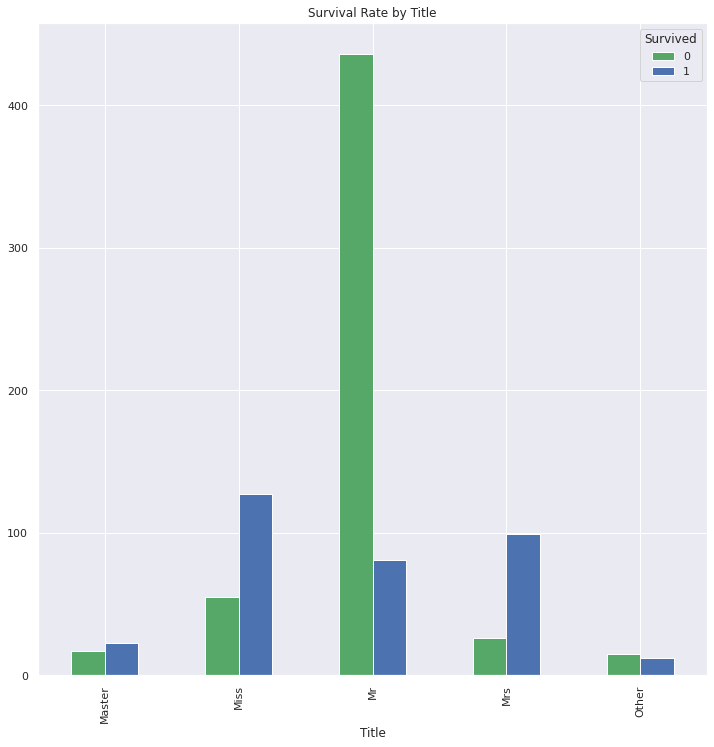

In [23]:
#Survival rate based on Title column i.e we created in previous step
pd.crosstab(train_df["Title"],train_df["Survived"]).plot.bar(figsize=(12,12),
                                                             title="Survival Rate by Title",
                                                             color = 'gb')

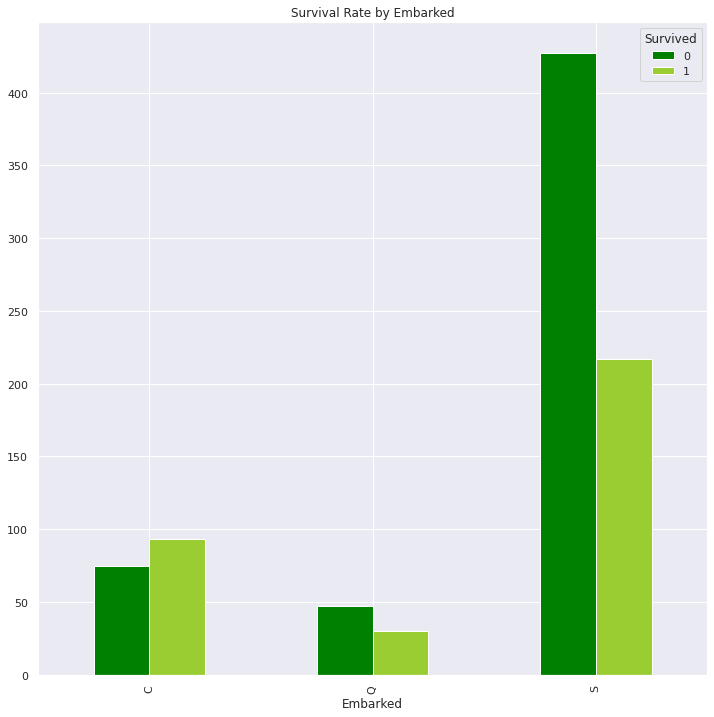

In [24]:
#You can see survival rate is higher in case of Southampton port
pd.crosstab(train_df["Embarked"],train_df["Survived"]).plot.bar(figsize=(12,12),
                                                                title="Survival Rate by Embarked",
                                                                color=["green","yellowgreen"])

You can the survival rate is higher for passengers who boarded from port Southampton.Lets try to fill in the missing value for
"Embarked"

In [25]:
#Lets check the data where Embarked is null from training dataset.We can see survived=1 in both the rows,so we will update Embarked as 'S' since survival rate is higher
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [26]:
#Filing Null Values for Embarked in train_df data set since survival rate is higher in case Embarked = 'S'
train_df["Embarked"].fillna("S",inplace = True)
train_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [27]:
#Now Lets fill the Cabin value as first letter(str[0]) from Cabin value and fill NULL values with "U" for Cabin feature
train_df["Cabin"] = train_df["Cabin"].str[0]
test_df["Cabin"] = test_df["Cabin"].str[0]
train_df["Cabin"].fillna("U",inplace=True)
test_df["Cabin"].fillna("U",inplace=True)

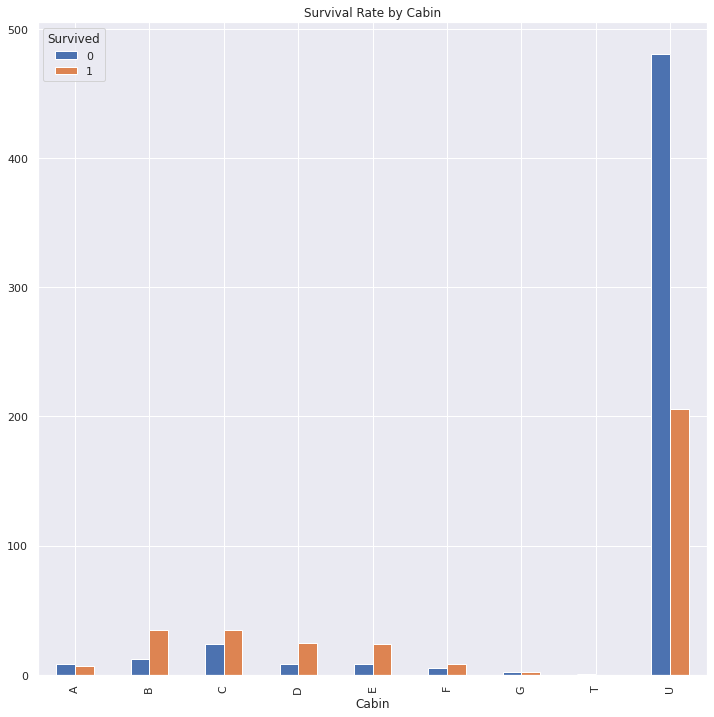

In [28]:
#Lets visualize the survival rate by Cabin fetaure from tarin data set
pd.crosstab(train_df["Cabin"],train_df["Survived"]).plot.bar(figsize=(12,12),
                                                             title="Survival Rate by Cabin")

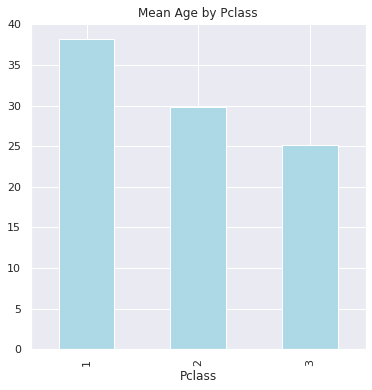

In [29]:
#Mean age by each class
train_df.groupby(["Pclass"]).mean()["Age"].plot.bar(figsize=(6,6),title="Mean Age by Pclass",color=["lightblue"])

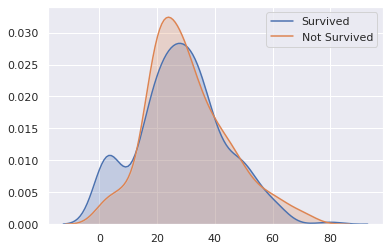

In [30]:
#age distribution by Survival rate
sns.kdeplot(train_df[train_df["Survived"] == 1]["Age"],label='Survived',shade = True);
sns.kdeplot(train_df[train_df["Survived"] == 0]["Age"],label='Not Survived',shade = True);
plt.show()

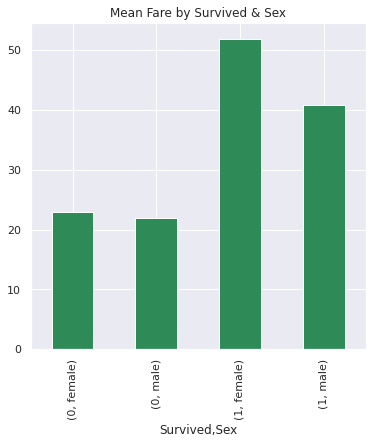

In [31]:
#Lets see mean of 'Fare' by Survived & Sex
train_df.groupby(["Survived","Sex"]).mean()["Fare"].plot.bar(figsize=(6,6),
                                                       title="Mean Fare by Survived & Sex",color = ["seagreen"])

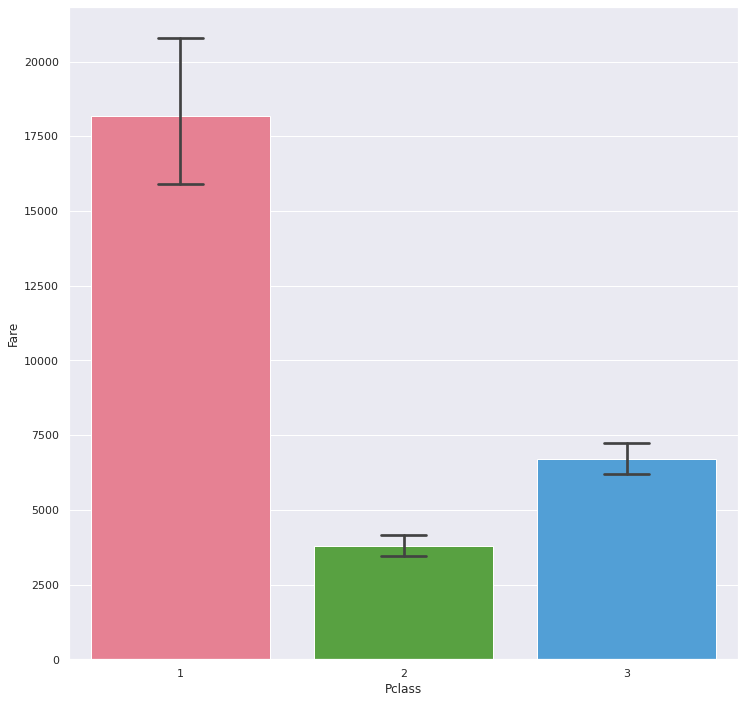

In [32]:
#You can see sum of fare is higher PClass = 1
plt.figure(figsize=(12,12))
sns.barplot(x='Pclass',y='Fare',data=train_df,estimator=sum,palette="husl",capsize=.2)

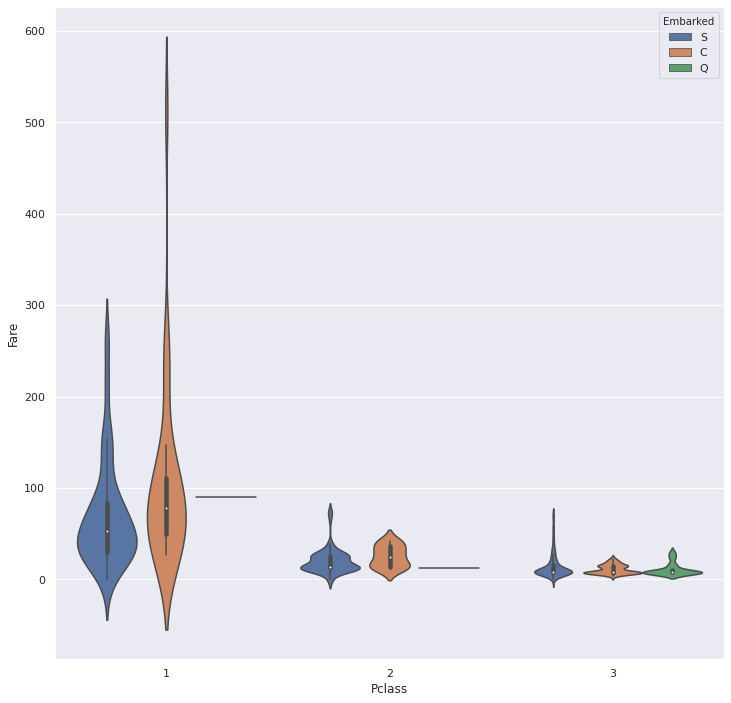

In [33]:
#Fare distribution by Pclass & Embarked
plt.figure(figsize=(12,12))
sns.violinplot(x='Pclass',
               y='Fare',
               data=train_df,
               hue='Embarked')

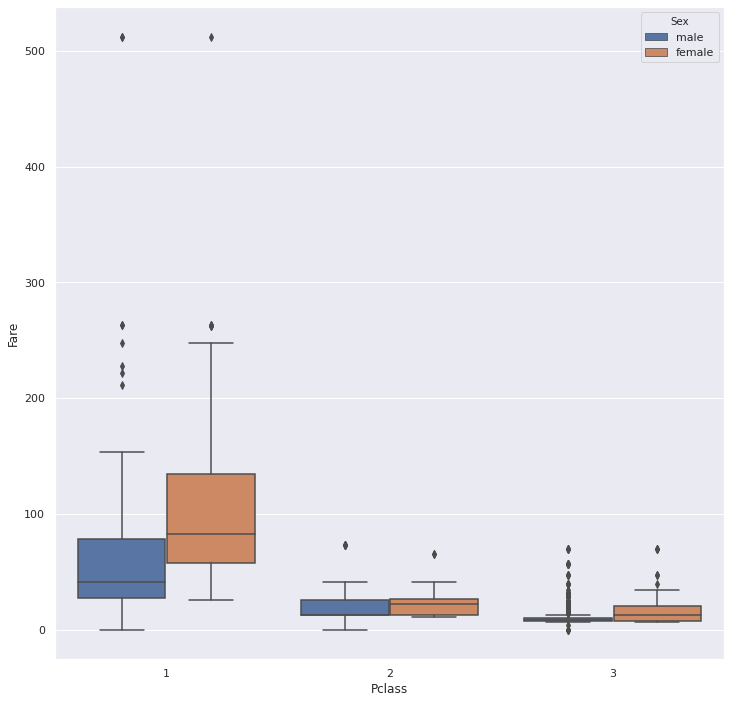

In [34]:
#Fare distribution by Pclass & Sex
plt.figure(figsize=(12,12))
sns.boxplot(x='Pclass',
            y='Fare',
            data=train_df,
            hue='Sex')

Now,lets create s scatter plot using bokeh plot

In [35]:
train_df.plot_bokeh.scatter(x="Fare",
                            y="Pclass",
                            category="Sex",
                            title="Fare Distribution by Sex using Scatter Plot")

Figure(id='1142', ...)

In [36]:
#Lets create a grid plot using scatter plot and plot-bokeh table from Dataframe
#Create Bokeh-Table with DataFrame
from bokeh.models.widgets import DataTable, TableColumn
from bokeh.models import ColumnDataSource

train_df_sample_table = DataTable(
    columns=[TableColumn(field=Ci, title=Ci) for Ci in train_df.columns],
    source=ColumnDataSource(train_df),
    height=300,
)

#create the scatter plot
train_df_scatter = train_df.plot_bokeh.scatter(x="Fare",
                                               y="Pclass",
                                               category="Sex",
                                               title="Titanic DataSet Visualization",
                                               show_figure=False)

# Combine Table and Scatterplot via grid layout:
pandas_bokeh.plot_grid([[train_df_sample_table, train_df_scatter]], plot_width=400, plot_height=350)




Column(id='1414', ...)

In [37]:
#Lets replace Sex fetaue as below for train and test data set
train_df["Sex"].replace({"male" : 1, "female" :0},inplace=True)
test_df["Sex"].replace({"male" : 1, "female" :0},inplace=True)

In [38]:
#Lets create family column by combining "SibSp" & "Parch" & assign family column as 4 as below
train_df["Family"] = train_df["SibSp"] + train_df["Parch"]
train_df.loc[train_df["Family"] > 3,"Family"] = 4
test_df["Family"] = test_df["SibSp"] + test_df["Parch"]
test_df.loc[test_df["Family"] > 3,"Family"] = 4

In [39]:
#Creating category columns for 'Embarked','Cabin','Title','Family','Pclass' for training data set
train_df_fam_Pclass = train_df.loc[:,['Embarked','Title','Family','Pclass']]
train_df_fam_Pclass_dummy = pd.get_dummies(train_df_fam_Pclass.astype('str'))
train_df_age_fare_sex = train_df.loc[:,['Sex','Age','Fare']]

In [40]:
#Creating train and test data set from training data set by splitting the input and output
x_train = pd.concat([train_df_age_fare_sex,train_df_fam_Pclass_dummy],axis="columns")
y_train = train_df.loc[:,"Survived"]

In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sex           891 non-null    int64  
 1   Age           714 non-null    float64
 2   Fare          891 non-null    float64
 3   Embarked_C    891 non-null    uint8  
 4   Embarked_Q    891 non-null    uint8  
 5   Embarked_S    891 non-null    uint8  
 6   Title_Master  891 non-null    uint8  
 7   Title_Miss    891 non-null    uint8  
 8   Title_Mr      891 non-null    uint8  
 9   Title_Mrs     891 non-null    uint8  
 10  Title_Other   891 non-null    uint8  
 11  Family_0      891 non-null    uint8  
 12  Family_1      891 non-null    uint8  
 13  Family_2      891 non-null    uint8  
 14  Family_3      891 non-null    uint8  
 15  Family_4      891 non-null    uint8  
 16  Pclass_1      891 non-null    uint8  
 17  Pclass_2      891 non-null    uint8  
 18  Pclass_3      891 non-null    

We can see there are still some null values for age column for train data set.Lets try to fillin null values for age column

In [42]:
#Lets update null values with mean value for male and female respectively
train_male_average_age = x_train[x_train["Sex"] == 1]["Age"].mean()
train_female_average_age = x_train[x_train["Sex"] == 0]["Age"].mean()
x_train.loc[x_train["Age"].isnull() & x_train["Sex"] == 1,"Age"] = train_male_average_age
x_train.loc[x_train["Age"].isnull(),"Age"] = train_female_average_age

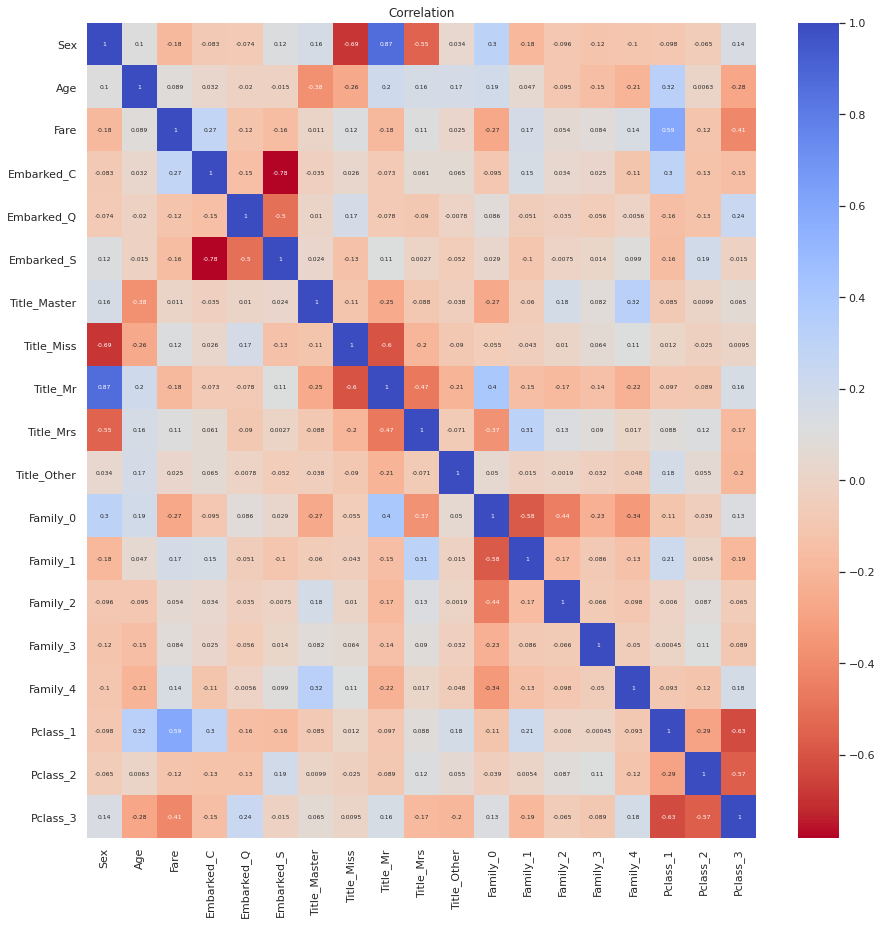

In [43]:
#Now lets create co-relation matrix for train data set
x_train_corr = x_train.corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(x_train_corr, xticklabels=x_train_corr.columns,yticklabels=x_train_corr.columns,cmap = "coolwarm_r",annot=True,annot_kws = {'size': 6})
plt.title("Correlation")
plt.show()

In [44]:
#lets see the skewness of the data
x_train.skew()

Sex            -0.618921
Age             0.424586
Fare            4.787317
Embarked_C      1.595149
Embarked_Q      2.948778
Embarked_S     -1.009665
Title_Master    4.403096
Title_Miss      1.469548
Title_Mr       -0.325752
Title_Mrs       2.075013
Title_Other     5.489323
Family_0       -0.420431
Family_1        1.662532
Family_2        2.425773
Family_3        5.277454
Family_4        3.388866
Pclass_1        1.204110
Pclass_2        1.452497
Pclass_3       -0.205685
dtype: float64

In [45]:
#Lets fill the missing values for test data set for Age column
test_male_average_age = test_df[test_df["Sex"] == 1]["Age"].mean()
test_female_average_age = test_df[test_df["Sex"] == 0]["Age"].mean()
test_df.loc[test_df["Age"].isnull() & test_df["Sex"] == 1,"Age"] = test_male_average_age
test_df.loc[test_df["Age"].isnull(),"Age"] = test_female_average_age

In [46]:
#Lets fill null value for Fare column by taking mean value of Fare for Pclass = 3
test_df[test_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
152,1044,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,U,S,Mr,0


In [47]:
#Lets take the mean fare for pclass=3 and apply for null value for fare
test_fare_pclass3_mean = test_df.loc[test_df["Pclass"] == 3,"Fare"].mean()
test_df.loc[test_df["Fare"].isnull(),"Fare"] = test_fare_pclass3_mean

In [48]:
#Lets create family column by combining "SibSp" & "Parch" for test data set
test_df["Family"] = test_df["SibSp"] + test_df["Parch"]
test_df.loc[test_df["Family"] > 3,"Family"] = 4
test_df_fam_Pclass = test_df.loc[:,['Embarked','Title','Family','Pclass']]
test_df_fam_Pclass_dummy = pd.get_dummies(test_df_fam_Pclass.astype('str'))
test_df_age_fare_sex = test_df.loc[:,['PassengerId','Sex','Age','Fare']]

In [49]:
x_test = pd.concat([test_df_age_fare_sex,test_df_fam_Pclass_dummy],axis="columns")

In [50]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Sex           418 non-null    int64  
 2   Age           418 non-null    float64
 3   Fare          418 non-null    float64
 4   Embarked_C    418 non-null    uint8  
 5   Embarked_Q    418 non-null    uint8  
 6   Embarked_S    418 non-null    uint8  
 7   Title_Master  418 non-null    uint8  
 8   Title_Miss    418 non-null    uint8  
 9   Title_Mr      418 non-null    uint8  
 10  Title_Mrs     418 non-null    uint8  
 11  Title_Other   418 non-null    uint8  
 12  Family_0      418 non-null    uint8  
 13  Family_1      418 non-null    uint8  
 14  Family_2      418 non-null    uint8  
 15  Family_3      418 non-null    uint8  
 16  Family_4      418 non-null    uint8  
 17  Pclass_1      418 non-null    uint8  
 18  Pclass_2      418 non-null    

Now lets apply this train data set to the classification models and try to find out the best accuracy score

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.823810 (0.024704)
LDA: 0.827150 (0.025654)
KNN: 0.709391 (0.049756)
CART: 0.773394 (0.042918)
NB: 0.805883 (0.020813)
SVM: 0.736326 (0.049178)


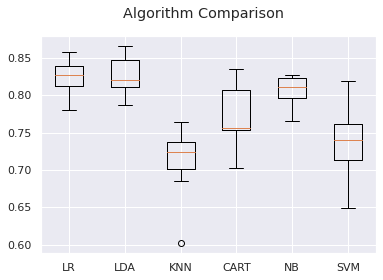

In [52]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# load dataset into variables
X = x_train.values
Y = y_train.values
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

In [53]:
#Lets put this data set into XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
xgbc = XGBClassifier(max_depth = 4)
test_size = 0.33
seed = 123
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = test_size, random_state = seed)
xgbc.fit(X_train, Y_train)
Y_pred = xgbc.predict(X_test)

xgbc_train_acc = round(xgbc.score(X_train, Y_train) * 100, 2)
print('Training Accuracy: ', xgbc_train_acc)
xgbc_test_acc = round(xgbc.score(X_test, Y_test) * 100, 2)
print('Testing Accuracy: ', xgbc_test_acc)

Training Accuracy:  95.64
Testing Accuracy:  86.44


In [54]:
x_test['Survived'] = xgbc.predict(x_test.drop(['PassengerId'], axis = 1))

In [55]:
x_test[['PassengerId', 'Survived']].to_csv('submission.csv', index = False)